In [144]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.animation as animation
from matplotlib import rc
from matplotlib import rc
from IPython.display import HTML, Image
rc('animation', html='html5')
import seaborn as sns # improves plot aesthetics

Populating the interactive namespace from numpy and matplotlib


In [87]:
col_names = ['Sample','Raw_reads','Clean_reads','Clean_reads_ratio','rRNA','rRNA_ratio','Kept_reads','hg38','hg38_ratio',
               'miRNA_pre','miRNA_pre_ratio','piRNA','piRNA_ratio','Y_RNA','Y_RNA_ratio',
                'snRNA','snRNA_ratio','srpRNA','srpRNA_ratio','tRNA','tRNA_ratio',
                'other_lncRNA','other_lncRNA_ratio','mRNA','mRNA_ratio']
table = pd.read_table('summary.txt',delimiter="\t",names = col_names,index_col=0,skiprows=[0])
count = 61

'01.Raw_reads', '02.reads_shorter_than_36nt', '03.Clean_reads',
       '05.Kept_reads', 'remove_rRNA', 'mapping_hg38', 'mapping_miRNA',
       'mapping_piRNA', 'mapping_Y_RNA', 'mapping_snRNA',
       'mapping_srpRNA', 'mapping_tRNA', 'mapping_other_lncRNA',
       'mapping_mRNA'

In [77]:
Raw_reads = np.array(table.iloc[:,0])
Clean_reads = np.array([np.array(table['Clean_reads_ratio'].str.split(' ')[i])[0] for i in range(61)])
Clean_reads_ratio = np.array([np.array(table['Clean_reads_ratio'].str.split(' '))[i][1][1:-1] for i in range(61)])
Kept_reads = np.array(table.iloc[:,3]) 
rRNA = np.array(table.iloc[:,4]) 
rRNA_ratio = np.array(table.iloc[:,5]) 
hg38 = np.array(table.iloc[:,6]) 
hg38_ratio = np.array(table.iloc[:,7]) 
miRNA_pre = np.array(table.iloc[:,8]) 
miRNA_pre_ratio = np.array(table.iloc[:,9]) 
piRNA = np.array(table.iloc[:,10]) 
piRNA_ratio = np.array(table.iloc[:,11]) 
Y_RNA = np.array(table.iloc[:,12]) 
Y_RNA_ratio = np.array(table.iloc[:,13]) 
snRNA = np.array(table.iloc[:,14]) 
snRNA_ratio = np.array(table.iloc[:,15]) 
srpRNA = np.array(table.iloc[:,16]) 
srpRNA_ratio = np.array(table.iloc[:,17]) 
tRNA = np.array(table.iloc[:,18]) 
tRNA_ratio = np.array(table.iloc[:,19]) 
other_lncRNA = np.array(table.iloc[:,20]) 
other_lncRNA_ratio = np.array(table.iloc[:,21]) 
mRNA = np.array(table.iloc[:,22]) 
mRNA_ratio = np.array(table.iloc[:,23])

In [114]:
newarray = np.concatenate((Raw_reads,pd.Series(Clean_reads),pd.Series(Clean_reads_ratio),rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,
            miRNA_pre,miRNA_pre_ratio,piRNA,piRNA_ratio,Y_RNA,Y_RNA_ratio,
                snRNA,snRNA_ratio,srpRNA,srpRNA_ratio,tRNA,tRNA_ratio,
                other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio),axis=0).reshape(-1,count).T
newtable = pd.DataFrame(newarray)
newtable.columns = col_names[1:]
newtable.head()

,Raw_reads,Clean_reads,Clean_reads_ratio,rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,miRNA_pre,miRNA_pre_ratio,...,snRNA,snRNA_ratio,srpRNA,srpRNA_ratio,tRNA,tRNA_ratio,other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio
0,66448520,59634503,89.7%,2993743,5.02%,56640760,48736526,81.73%,28617222,47.99%,...,69142,0.12%,16023,0.03%,74897,0.13%,5109788,8.57%,455088,0.76%
1,19811909,18471503,93.2%,351173,1.90%,18120330,13702414,74.18%,7679708,41.58%,...,67671,0.37%,13628,0.07%,25160,0.14%,1014445,5.49%,75886,0.41%
2,58813414,52631685,89.5%,2552199,4.85%,50079486,42018095,79.83%,20545637,39.04%,...,73615,0.14%,16960,0.03%,65232,0.12%,4375977,8.31%,389364,0.74%
3,70911180,66016169,93.1%,1076671,1.63%,64939498,53921958,81.68%,39575057,59.95%,...,40361,0.06%,15454,0.02%,94992,0.14%,2223669,3.37%,109932,0.17%
4,34239617,28912005,84.4%,30094,0.10%,28881911,25344538,87.66%,15782566,54.59%,...,255477,0.88%,9020,0.03%,30145,0.10%,1012429,3.50%,66675,0.23%


Kept_reads :all 
other genomic region: hg38 - else  ratio:(hg38 - else)/Kept_reads
non human region: Kept_reads - hg38  ratio:(Kept_reads - hg38)/Kept_reads

In [145]:
newtable['other_genomic_region'] = newtable['hg38'] - (newtable['miRNA_pre'] +newtable['piRNA'] +
                 newtable['Y_RNA'] +newtable['snRNA']+newtable['srpRNA']+
                    newtable['tRNA']+newtable['other_lncRNA']+newtable['mRNA'])
newtable['non_human'] = newtable['Kept_reads'] - newtable['hg38']
newtable['other_genomic_region_ratio'] = newtable['other_genomic_region']/newtable['Kept_reads']
newtable['non_human_ratio'] = newtable['non_human']/newtable['Kept_reads']


In [158]:
def p2f(x):
    return float(x.strip('%'))/100
indexper = np.concatenate((np.array([2,4]),np.arange(7,25,2)))
newarray_per = np.array(newtable).copy()
for i in indexper:
    for j in range(count):
        newarray_per[j,i] = p2f(newarray[j,i])
newarray_per = newarray_per.astype('float')

In [159]:
average = np.average(newarray_per,axis=0)

In [419]:
average

array([5.09940060e+07, 4.51796240e+07, 8.90196721e-01, 1.19220857e+06,
       2.60065574e-02, 4.39874154e+07, 3.77075649e+07, 8.28260656e-01,
       1.78526121e+07, 3.85990164e-01, 8.85232131e+05, 1.94163934e-02,
       1.49870234e+07, 3.34611475e-01, 4.43406721e+04, 1.04098361e-03,
       1.48302131e+04, 3.45901639e-04, 5.77215410e+04, 1.28360656e-03,
       2.47326980e+06, 5.42803279e-02, 1.95844459e+05, 4.30163934e-03,
       1.19669057e+06, 6.27985049e+06, 2.78682435e-02, 1.49415201e-01])

In [160]:
newtable.head()

,Raw_reads,Clean_reads,Clean_reads_ratio,rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,miRNA_pre,miRNA_pre_ratio,...,tRNA,tRNA_ratio,other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio,other_genomic_region,non_human,other_genomic_region_ratio,non_human_ratio
0,66448520,59634503,89.7%,2993743,5.02%,56640760,48736526,81.73%,28617222,47.99%,...,74897,0.13%,5109788,8.57%,455088,0.76%,2319057,7904234,0.0409433,0.13955
1,19811909,18471503,93.2%,351173,1.90%,18120330,13702414,74.18%,7679708,41.58%,...,25160,0.14%,1014445,5.49%,75886,0.41%,1064507,4417916,0.0587466,0.24381
2,58813414,52631685,89.5%,2552199,4.85%,50079486,42018095,79.83%,20545637,39.04%,...,65232,0.12%,4375977,8.31%,389364,0.74%,1915280,8061391,0.0382448,0.160972
3,70911180,66016169,93.1%,1076671,1.63%,64939498,53921958,81.68%,39575057,59.95%,...,94992,0.14%,2223669,3.37%,109932,0.17%,1543657,11017540,0.0237707,0.169659
4,34239617,28912005,84.4%,30094,0.10%,28881911,25344538,87.66%,15782566,54.59%,...,30145,0.10%,1012429,3.50%,66675,0.23%,728187,3537373,0.0252126,0.122477


In [424]:
newtable.to_csv('4.26.csv')

In [161]:
rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'snRNA','srpRNA','tRNA',
            'lncRNA','mRNA','other_genomic_region','non_human',
            ]
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.) 
colours = tableau20[:10]

In [162]:
rnaindex= [9,11,13,15,17,19,21,23,26,27]

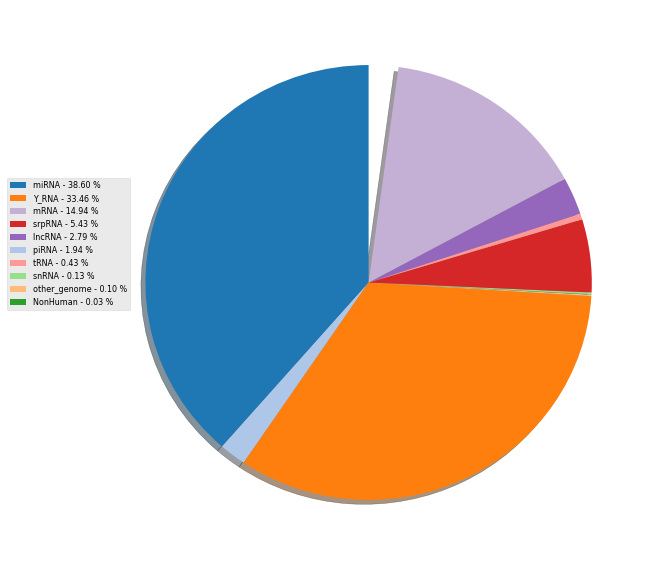

In [423]:
import matplotlib.pyplot as plt
import numpy as np

x = rnanames
y = average[rnaindex]
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts = ax1.pie(y, explode=explode, colors=colours, #autopct='%1.1f%%',
                        shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(0.08, .7),
           fontsize=8)

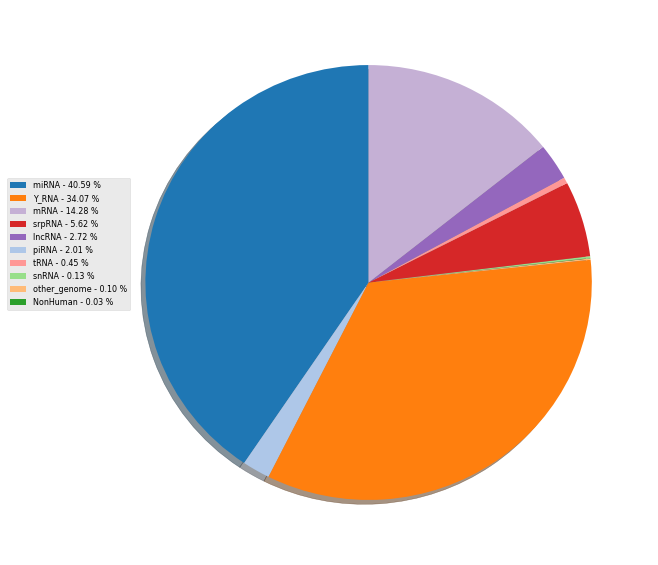

In [425]:
import matplotlib.pyplot as plt
import numpy as np
rnaindex_ = [8,10,12,14,16,18,20,22,24,25]
x = rnanames
y = average[rnaindex_]/average[5]
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts = ax1.pie(y, explode=explode, colors=colours, #autopct='%1.1f%%',
                        shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(0.08, .7),
           fontsize=8)

In [426]:
randnarr = np.random.uniform(-18,18,61).reshape(-1,1)
for i in range(9):
    randnarr = np.concatenate((randnarr,np.random.uniform(-18,18,61).reshape(-1,1)),axis=1)

In [427]:
#ratiodata:
ratiodata = [newarray_per[i,rnaindex_]/newarray_per[i,5] for i in range(count)]
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
dataarr =ratiodata
colave =  average[rnaindex]
sizes = np.repeat(16,10) +np.ceil((colave/np.average(colave) *2))
transformed = scalar.fit_transform(dataarr)
#dattest = pd.DataFrame(transformed)
angle = np.repeat(np.arange(0,360,36),count).reshape(10,-1).T +randnarr
#sizes = np.ceil((colave/np.average(colave) *10))
data_r = np.multiply(transformed,np.repeat(10,count*10).reshape(61,-1))
data_theta = np.multiply(transformed,np.repeat(36,count*10).reshape(61,-1))+angle
concatdata = pd.concat((pd.DataFrame(data_r,columns=['trial_'+str(i+1)+'_r' for i in range(10)]),
          pd.DataFrame(data_theta,columns=['trial_'+str(i+1)+'_theta' for i in range(10)])),axis=1)
concatdata.head()

,trial_1_r,trial_2_r,trial_3_r,trial_4_r,trial_5_r,trial_6_r,trial_7_r,trial_8_r,trial_9_r,trial_10_r,trial_1_theta,trial_2_theta,trial_3_theta,trial_4_theta,trial_5_theta,trial_6_theta,trial_7_theta,trial_8_theta,trial_9_theta,trial_10_theta
0,6.776136,3.544847,2.795129,1.234185,1.001844,3.731992,5.107468,3.221269,3.787908,1.433268,38.031577,54.819240,97.501136,95.814661,156.067090,191.133024,219.984905,264.682136,303.366171,319.824566
1,5.640248,0.392667,2.990391,4.124168,3.958631,4.005446,2.792933,1.473378,5.857666,2.813342,27.594625,32.157595,97.825010,116.683376,163.082265,200.569942,233.169870,261.032862,325.376117,335.870468
2,5.451127,3.102585,4.119818,1.520734,1.353319,3.650397,4.915887,3.103258,3.474195,1.716824,3.441368,56.367268,80.039811,96.420283,140.755098,187.385022,218.558402,250.668218,285.033368,338.896650
3,8.229393,0.687259,2.172753,0.545330,0.718811,4.312377,1.322833,0.339671,1.791479,1.831808,33.863426,37.716861,71.052579,98.629015,162.265843,209.507142,222.279746,251.913511,297.774407,320.151123
4,7.351041,0.000000,3.849997,10.000000,1.187231,2.580883,1.377733,0.619434,1.959106,1.207272,21.780815,39.244363,91.872895,149.069019,138.255946,200.121725,225.914118,254.644348,284.050592,314.885293


In [428]:
import plotly
import plotly.offline as off
import plotly.plotly as py
import plotly.graph_objs as go
data1 = [go.Scatterpolar(
      r = concatdata['trial_'+str(i+1)+'_r'],
      theta = concatdata['trial_'+str(i+1)+'_theta'],
      mode = "markers",
      name = rnanames[i],
      marker = dict(
        color = ['rgb(230,171,2)' ,"rgb(102,166,30)","rgb(231,41,138)" ,"rgb(117,112,179)"  ,"rgb(217,95,2)"
 ,"rgb(27,158,119)" ,"rgb(61,74,192)","rgb(47,192,66)","rgb(182,192,47)","rgb(187,47,192)"][i],
        size = sizes[i],
        line = dict(
          color = "white"
        ),
        opacity = 0.7
      ),
      cliponaxis = False
    ) for i in range(10)]
#data
layout = go.Layout(
    title = "RNA",
    font = dict(
      size = 15
    ),
    showlegend = False,
    polar = dict(
      bgcolor = "rgb(223, 223, 223)",
      angularaxis = dict(
        tickwidth = 2,
        linewidth = 3,
        layer = "below traces"
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 2,
        tickwidth = 2,
        gridcolor = "white",
        gridwidth = 2
      )
    ),
    paper_bgcolor = "rgb(223, 223, 223)"
)

fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, validate = False)

In [429]:
y = ratiodata[0]
ax.pie(y,  colors=colours, 
                        shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x1a2d2f46d0>,
 [Text(-1.09985,-0.0181101,u''),
  Text(0.117994,-1.09365,u''),
  Text(0.771442,-0.784142,u''),
  Text(1.07926,-0.212618,u''),
  Text(1.08025,-0.207517,u''),
  Text(1.08128,-0.202067,u''),
  Text(1.09419,0.112907,u''),
  Text(1.00818,0.439963,u''),
  Text(0.928842,0.589282,u''),
  Text(0.46695,0.995971,u'')])

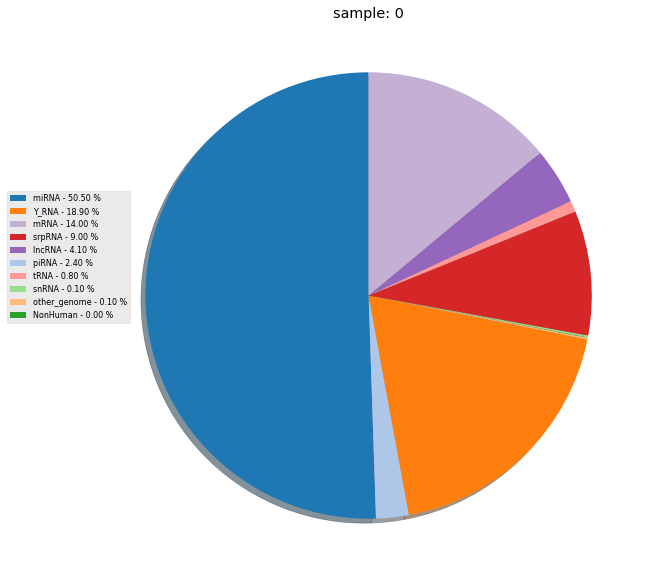

In [430]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

colors = tableau20[:10]
explode = (0,0,0,0,0,0,0.0, 0.0, 0.0, 0.0)
#rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'other_genome','NonHuman','snRNA','srpRNA','tRNA','lncRNA','mRNA']


fig, ax = plt.subplots(figsize=(10,10))

def update(num):
    ax.clear()
    ax.axis('equal')
    x = rnanames
    y = ratiodata[num]
    z = np.array([float('{:.3f}'.format(y[i])) for i in range(y.shape[0])])*100
    patches, texts = ax.pie(y,  colors=colours, 
                        shadow=True, startangle=90)
    ax.set_title('sample: '+str(num))
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
    plt.legend(patches, labels, loc='left center', bbox_to_anchor=(0.08, 0.7),
           fontsize=8)

ani = FuncAnimation(fig, update, frames=range(61), interval=500,repeat=True)
ani

In [446]:
np.loadtxt('total.per2_',dtype='str')[0]
lengthdat = np.loadtxt('total.per2_',dtype='str')[1:,1:].astype('float')

In [447]:
lengthdat.shape

(36, 9)

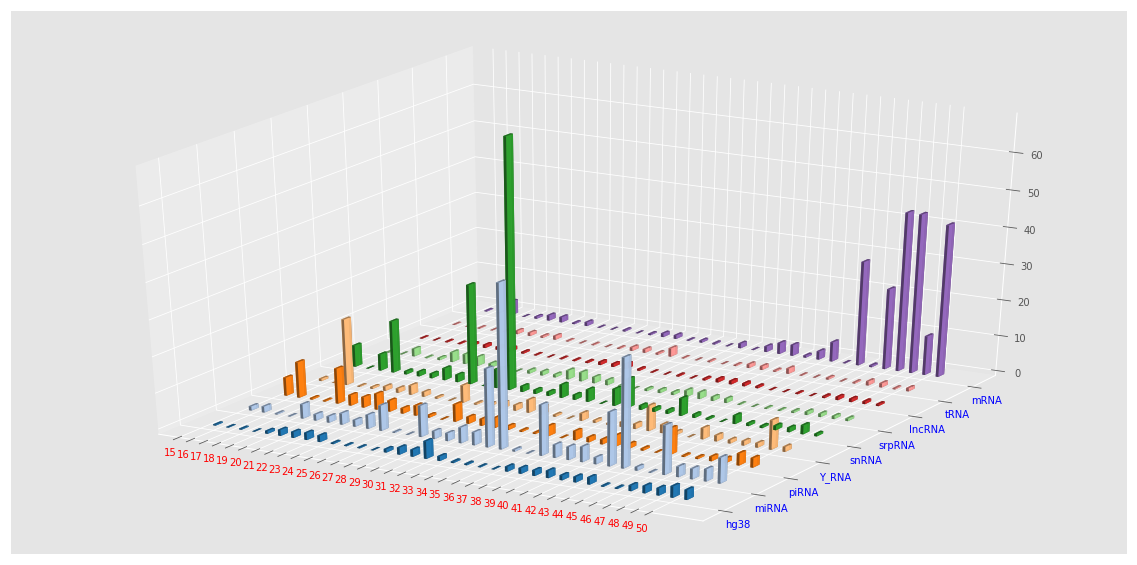

In [455]:
lengthname = ['hg38', 'miRNA', 'piRNA', 'Y_RNA', 'snRNA', 'srpRNA', 'lncRNA','tRNA', 'mRNA']
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

count = 36
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, projection='3d')

xpos = np.repeat(np.arange(1,count+1),9).reshape(count,-1).T.ravel()
ypos = np.repeat(range(9),count).ravel()
num_elements = len(xpos)
zpos = np.zeros(count*9)
dx = np.ones(count*9)/5
dy = np.ones(count*9)/5
dz = lengthdat.ravel()

for i in range(9):
    ax1.bar3d(xpos[count*i:count*(i+1)], ypos[count*i:count*(i+1)], zpos[count*i:count*(i+1)],
              dx[count*i:count*(i+1)], dy[count*i:count*(i+1)],dz[count*i:count*(i+1)], color=tableau20[i],alpha=0.9)
plt.xticks(range(count), [str(i+15) for i in range(count)], color='red')
plt.yticks(range(9), lengthname, color='blue')
#ax1.bar3d(xpos[3:], ypos[3:], zpos[3:], dx[3:], dy[3:], dz[3:], color='b')
plt.show()

In [452]:
xpos.shape

(324,)

In [458]:
dfnew = pd.DataFrame(np.concatenate((xpos.reshape(-1,1),ypos.reshape(-1,1),dz.reshape(-1,1),dz.reshape(-1,1)*100),axis=1))
dfnew.columns = ['x','y','percentage','size']
dfnew['rnaname'] = np.repeat(np.array(lengthname),count)
hover_text = []
for index, row in dfnew.iterrows():
    hover_text.append(('RNA: {country}<br>'+
                      'Reads Length: {lifeExp}<br>'+
                      'Reads percentage: {gdp}<br>'
                      ).format(country=row['rnaname'],
                                            lifeExp=row['x'],
                                            gdp=row['percentage']
                                           ))
sizeref = 2.*max(dfnew['size'])/(100**2)
dfnew['text'] = hover_text
data = [go.Scatter(
    y=dfnew['y'][dfnew['rnaname'] ==lengthname[i]],
    x=dfnew['x'][dfnew['rnaname'] == lengthname[i]]+15,
    mode='markers',
    name=lengthname[i],
    text=dfnew['text'][dfnew['rnaname'] == lengthname[i]],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=dfnew['size'][dfnew['rnaname'] == lengthname[i]],
        line=dict(
            width=2
        ),
    )
) for i in range(9)]


layout = go.Layout(
    title='Reads length distribution',
    xaxis=dict(
        title='Length',
        gridcolor='rgb(255, 255, 255)',
        range=[10,60],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='RNA',
        gridcolor='rgb(255, 255, 255)',
        range=[-1,10],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='life-expectancy-per-GDP-2007')